<a href="https://colab.research.google.com/github/Jacob-Thomas-I21/ML-ASSIGNMENTS/blob/main/ML_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

In [2]:
# Load the dataset
df = pd.read_csv("/content/house_price.csv")

# **QUESTION 1**

In [3]:
print("Basic Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None

First 5 rows:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanu

# **QUESTION 2a**

In [4]:
col = 'price_per_sqft'
if col not in df.columns:
    raise ValueError("The dataset does not contain 'price_per_sqft'. Check column names.")
print("\nQ2: Outlier Detection and Removal")



Q2: Outlier Detection and Removal


In [5]:
mean_val = df[col].mean()
std_dev = df[col].std()
z_scores = np.abs((df[col] - mean_val) / std_dev)
outlier_threshold = 3
trimmed_df_mean_std = df[z_scores < outlier_threshold].copy()
print(f"Mean: {mean_val}, Standard Deviation: {std_dev}")
print(f"Outliers detected using Mean & Std: {sum(z_scores > outlier_threshold)}")

Mean: 7920.336742424242, Standard Deviation: 106727.16032810845
Outliers detected using Mean & Std: 5


# **QUESTION 2b**

In [6]:
lower_bound = df[col].quantile(0.01)
upper_bound = df[col].quantile(0.99)
df_percentile = df.copy()
df_percentile[col] = np.clip(df[col], lower_bound, upper_bound)
print(f"1st Percentile: {lower_bound}, 99th Percentile: {upper_bound}")

1st Percentile: 2549.0, 99th Percentile: 23674.45000000001


# **QUESTION 2c**

In [7]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
trimmed_df_iqr = df[(df[col] >= lower_bound_iqr) & (df[col] <= upper_bound_iqr)].copy()

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound_iqr}, Upper Bound: {upper_bound_iqr}")

Q1: 4267.0, Q3: 7317.0, IQR: 3050.0
Lower Bound: -308.0, Upper Bound: 11892.0


# **QUESTION 2d**

In [8]:
z_scores_all = np.abs(zscore(df[col]))
df_zscore = df.copy()
df_zscore[col] = np.where(z_scores_all > 3, df[col].median(), df[col])
z_threshold = 2.5
print(f"Z-Score Method detected {sum(z_scores_all > z_threshold)} outliers.")


Z-Score Method detected 5 outliers.


In [9]:
print(f"Original count: {df[col].count()}")
print(f"Mean-Std Trim count: {trimmed_df_mean_std[col].count()}")
print(f"Percentile Cap count: {df_percentile[col].count()}")
print(f"IQR Trim count: {trimmed_df_iqr[col].count()}")
print(f"Z-Score Impute count: {df_zscore[col].count()}")


Original count: 13200
Mean-Std Trim count: 13195
Percentile Cap count: 13200
IQR Trim count: 11935
Z-Score Impute count: 13200


In [10]:
#  Before & After Outlier Removal
print("\nBefore Outlier Removal:")
print(df.describe())
print("\nAfter Removing Outliers (Mean & Std):")
print(trimmed_df_mean_std.describe())
print("\nAfter Capping Outliers (Percentile Method):")
print(df_percentile.describe())
print("\nAfter Removing Outliers (IQR Method):")
print(trimmed_df_iqr.describe())
print("\nAfter Imputing Outliers (Z-Score Method using Median):")
print(df_zscore.describe())


Before Outlier Removal:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07

After Removing Outliers (Mean & Std):
         total_sqft         bath         price           bhk  price_per_sqft
count  13195.000000  13195.00000  13195.000000  13195.000000    13195.000000
mean    1555.884482      2.69064    112.267415      2.800152     6713.708602
std

*   IQR Trimming (Removed data beyond 1.5 * IQR).

* Mean-Std Trimming (Removed data beyond 3 std deviations).

*  Percentile Capping (Capped at 1st and 99th percentile).

*   Z-Score Imputation (Replaced extreme values with the median).




In [12]:
print(f"Original dataset size: {df.shape[0]}")
print(f"Mean-Std Trimmed size: {trimmed_df_mean_std.shape[0]}")
print(f"Percentile Capped size: {df_percentile.shape[0]}")
print(f"IQR Trimmed size: {trimmed_df_iqr.shape[0]}")
print(f"Z-Score Imputed size: {df_zscore.shape[0]}")

Original dataset size: 13200
Mean-Std Trimmed size: 13195
Percentile Capped size: 13200
IQR Trimmed size: 11935
Z-Score Imputed size: 13200


# **QUESTION 3**

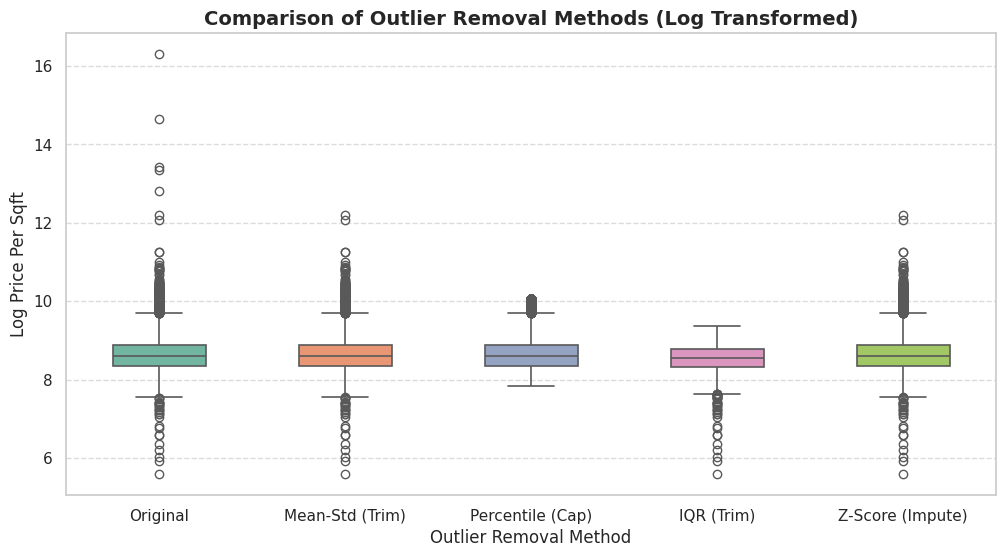

In [14]:
df_combined = pd.DataFrame({
    "Original": np.log1p(df[col]),
    "Mean-Std (Trim)": np.log1p(trimmed_df_mean_std[col]),
    "Percentile (Cap)": np.log1p(df_percentile[col]),
    "IQR (Trim)": np.log1p(trimmed_df_iqr[col]),
    "Z-Score (Impute)": np.log1p(df_zscore[col])
})


df_melted = df_combined.melt(var_name="Method", value_name="Log Price Per Sqft")

labels = ["Original", "Mean-Std (Trim)", "Percentile (Cap)", "IQR (Trim)", "Z-Score (Impute)"]


plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")


sns.boxplot(
    x="Method",
    y="Log Price Per Sqft",
    hue="Method",
    data=df_melted,
    palette="Set2",
    linewidth=1.2,
    width=0.5,
    legend=False
)


plt.title("Comparison of Outlier Removal Methods (Log Transformed)", fontsize=14, fontweight='bold')
plt.xlabel("Outlier Removal Method", fontsize=12)
plt.ylabel("Log Price Per Sqft", fontsize=12)


plt.xticks(rotation=0, fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()






In [15]:
summary_data = {}
data_list = [
    np.log1p(df[col].dropna()),
    np.log1p(trimmed_df_mean_std[col].dropna()),
    np.log1p(df_percentile[col].dropna()),
    np.log1p(trimmed_df_iqr[col].dropna()),
    np.log1p(df_zscore[col].dropna())
]

for method, data in zip(labels, data_list):
    q1, q3 = np.percentile(data.dropna(), 25), np.percentile(data.dropna(), 75)
    iqr = q3 - q1
    outliers = sum((data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr))
    summary_data[method] = {"Q1": q1, "Q3": q3, "IQR": iqr, "Outliers Detected": outliers}

summary_data

{'Original': {'Q1': 8.358900612421644,
  'Q3': 8.898092345579153,
  'IQR': 0.5391917331575087,
  'Outliers Detected': 560},
 'Mean-Std (Trim)': {'Q1': 8.358783447804822,
  'Q3': 8.897545598709327,
  'IQR': 0.5387621509045051,
  'Outliers Detected': 557},
 'Percentile (Cap)': {'Q1': 8.358900612421644,
  'Q3': 8.898092345579153,
  'IQR': 0.5391917331575087,
  'Outliers Detected': 533},
 'IQR (Trim)': {'Q1': 8.334951631422454,
  'Q3': 8.795430805040018,
  'IQR': 0.4604791736175642,
  'Outliers Detected': 39},
 'Z-Score (Impute)': {'Q1': 8.358900612421644,
  'Q3': 8.897545598709327,
  'IQR': 0.5386449862876823,
  'Outliers Detected': 557}}

# **IQR is the Best**
Removes the most extreme values while maintaining the overall distribution.
The whiskers are shorter, indicating that the dataset is now less skewed.


# **QUESTION 4**

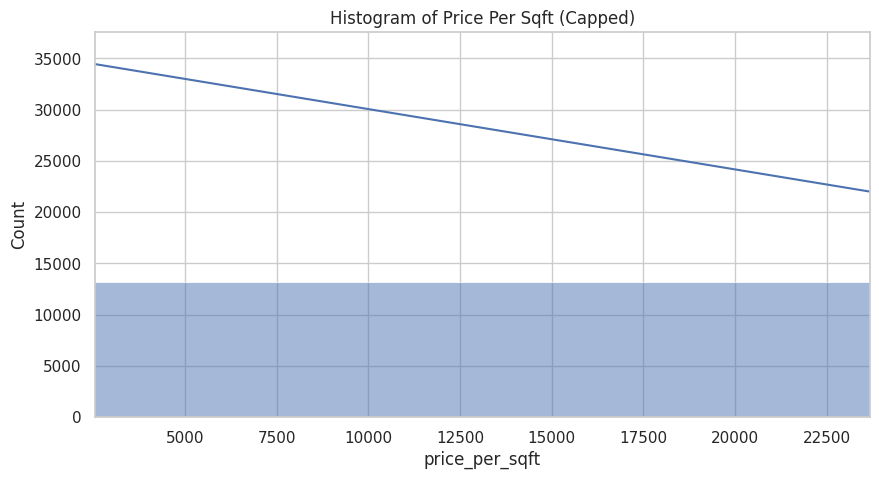

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df[col], bins=100, kde=True)
plt.xlim([df[col].quantile(0.01), df[col].quantile(0.99)])
plt.title("Histogram of Price Per Sqft (Capped)")
plt.show()

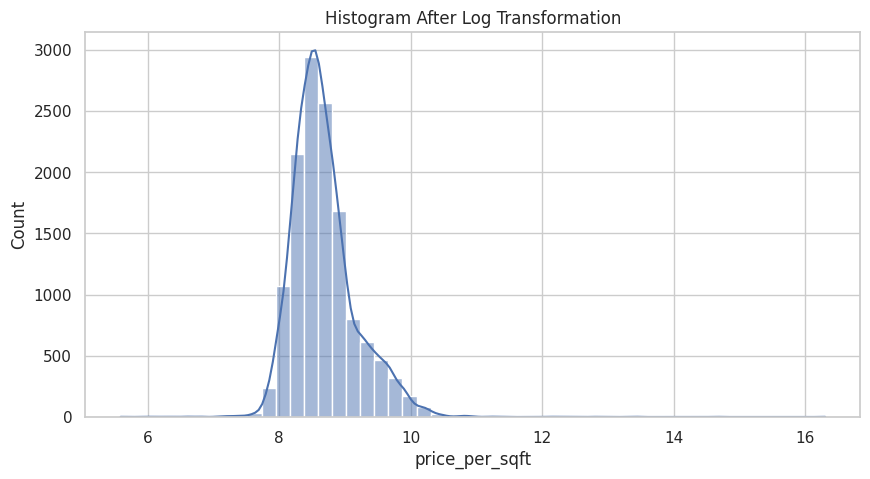

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df[col]), bins=50, kde=True)
plt.title("Histogram After Log Transformation")
plt.show()

In [18]:
original_skew = skew(df[col])
original_kurtosis = kurtosis(df[col])
transformed_skew = skew(np.log1p(df[col]))
transformed_kurtosis = kurtosis(np.log1p(df[col]))

print(f"\nSkewness Before Transformation: {original_skew}")
print(f"Kurtosis Before Transformation: {original_kurtosis}")
print(f"Skewness After Transformation: {transformed_skew}")
print(f"Kurtosis After Transformation: {transformed_kurtosis}")


Skewness Before Transformation: 108.26875024325159
Kurtosis Before Transformation: 12090.633538860382
Skewness After Transformation: 1.4003259019533636
Kurtosis After Transformation: 9.203000543610957


# **QUESTION 5**

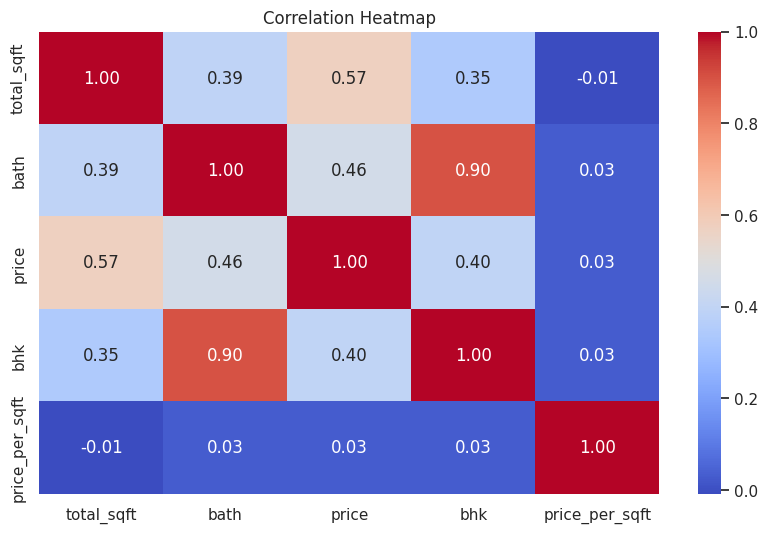

In [19]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# **QUESTION 6**

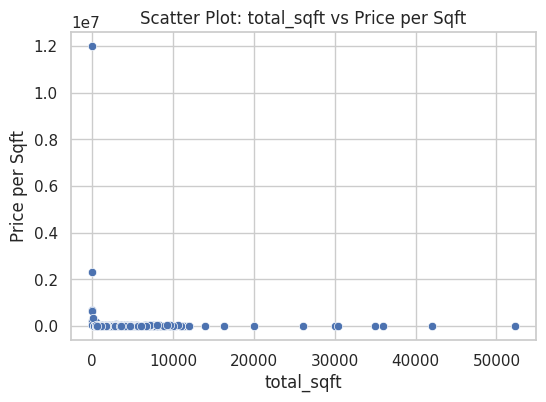

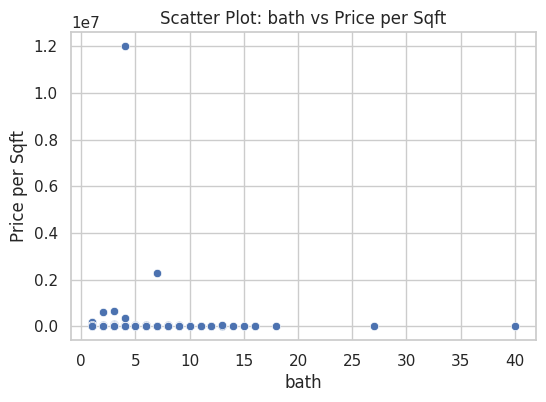

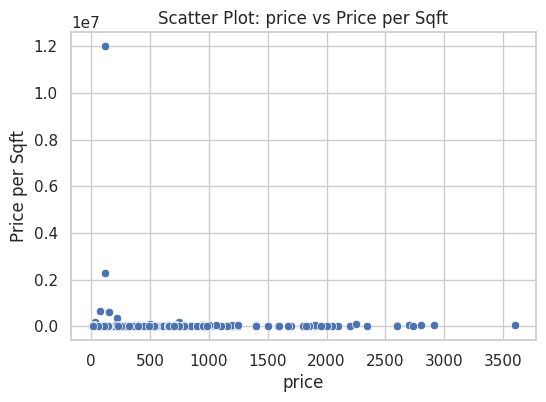

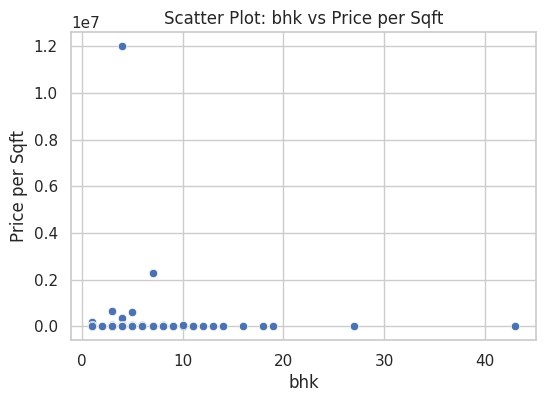

In [20]:
for col in numeric_df.columns:
    if col != 'price_per_sqft':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['price_per_sqft'])
        plt.xlabel(col)
        plt.ylabel('Price per Sqft')
        plt.title(f'Scatter Plot: {col} vs Price per Sqft')
        plt.show()